**Importing Libraries**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Importing data into the notebook**

Load data from local drive 

In [3]:
from google.colab import files
uploaded = files.upload()


Saving WineQT.csv to WineQT.csv


In [4]:
df= pd.read_csv('WineQT.csv')
# shows the first five rows of the dataset.
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
# shows the last five rows of the dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
df.shape

(1143, 13)

The datase has got 1143 rows and 13 columns

In [7]:
# gives a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


**DATA CLEANING**

**Checking for missing values**

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

This shows that there are no missing values in the dataset

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

There are no null values

**Checking for duplicate values**

In [10]:
df.duplicated().sum()

0

> There are no duplicates in the dataset

**DATA ANALYSIS AND VISUALIZATION**

**Statistical measure of the dataset**

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


**Checking the number of values for each quality**

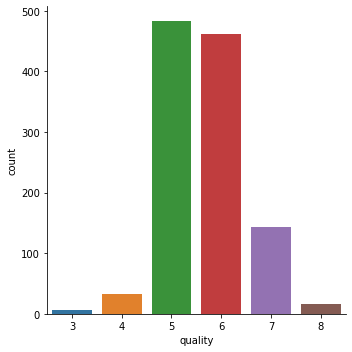

In [12]:
sns.catplot(data= df, x="quality", kind='count')

>>This show that more wine has a quality of 5 and 6.

>>We can also derive that showing that a great number of people purchased wine from quality 5, this shows that fine wine has a quality of 5 and above and vice versa.

**Comparison of values to the quality of the wine**

**Fixed acidity vs Quality**


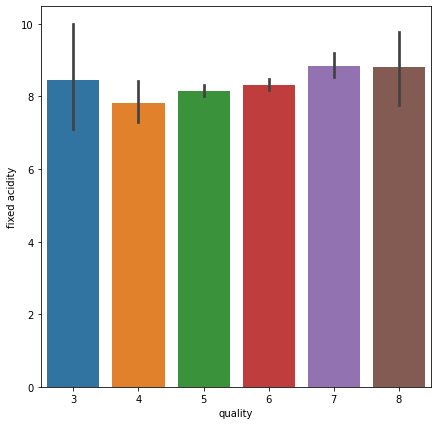

In [13]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data= df, x="quality", y="fixed acidity")

The higher the fixed acidity the higher the quality

**Volatile acidity vs Quality**

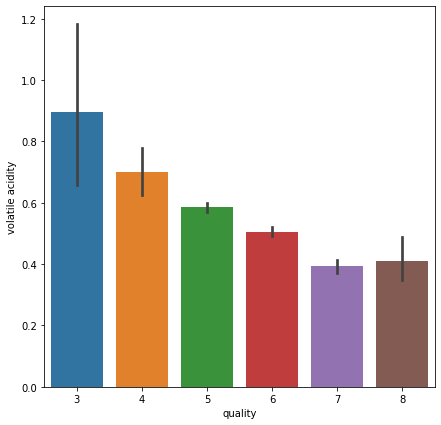

In [14]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data= df, x="quality", y= "volatile acidity")

The higher the volatile acidity the lower the quality and the lower the volatile acildity the higher the quality.

**Citric acid vs Quality**

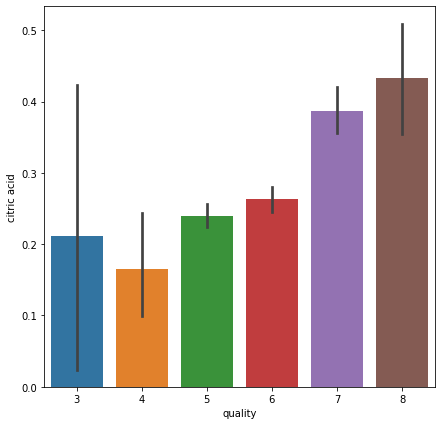

In [15]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="citric acid")

The higher the citric acid the higher the quality.
> The lower the citric acid the lower the quality

**Residual sugar vs Quality**

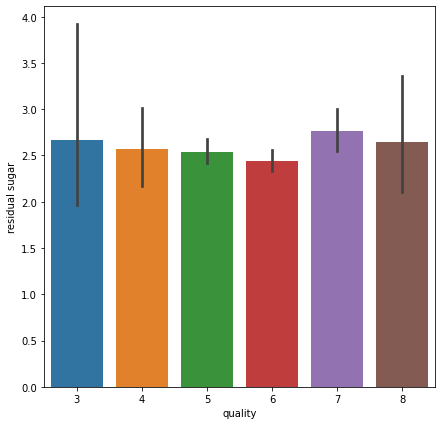

In [16]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="residual sugar")

**Chlorides vs Quality**

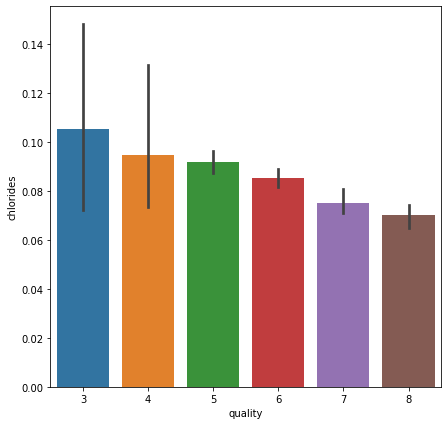

In [17]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="chlorides")

> The higher the chloride content on the wine the lower the quality.
>> The lower the chloride content the higher the quality.

**Free Sulphur Dioxide vs Quality**

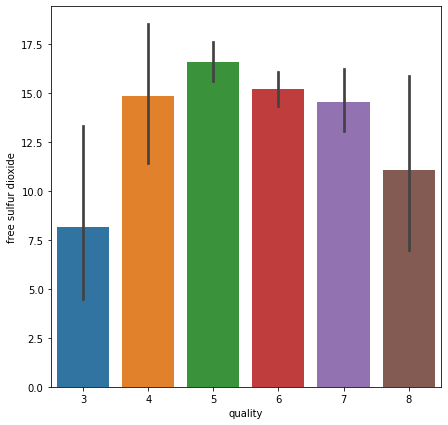

In [18]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="free sulfur dioxide")

The higher the free sulphur dioxide the average the quqlity of wine.

**Total sulfur dioxide vs Quality**

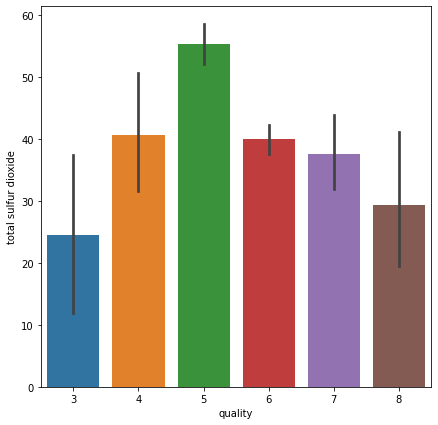

In [19]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="total sulfur dioxide")

The more the total sulfur dioxide the average the quality of wine

**Density vs Quality**

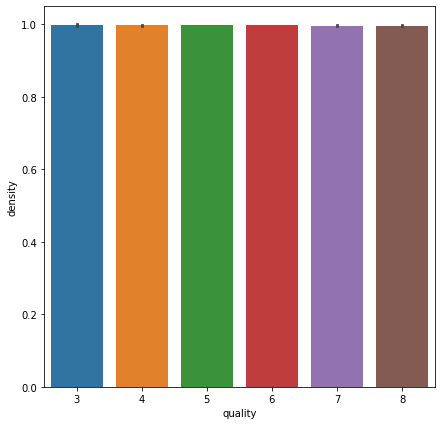

In [20]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="density")

The density is the same in all qualities of wine

**PH vs Quality**

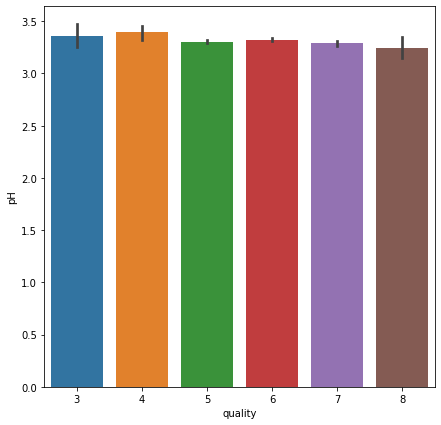

In [21]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="pH")

The PH is averagely the same in all wine qualities

**Sulphates vs Quality**

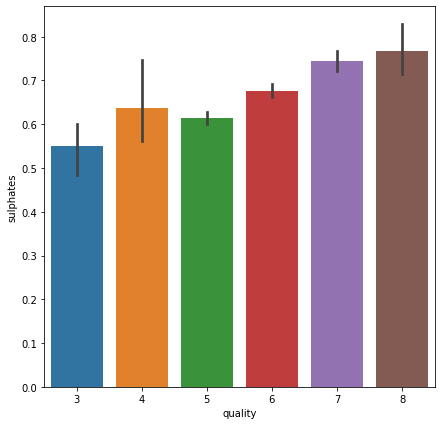

In [22]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="sulphates")

> The higher the sulphate content the higher the quality of wine and vice versa

Alcohol content vs Quality

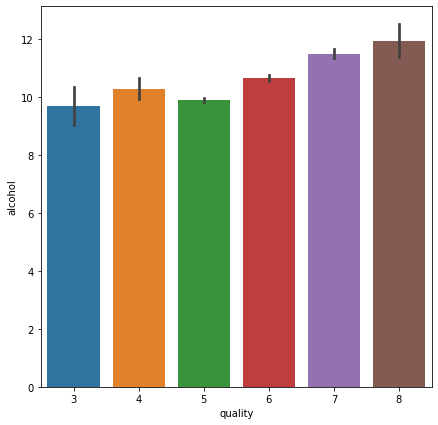

In [23]:
plot= plt.figure(figsize=(7,7))
sns.barplot(data=df, x="quality", y="alcohol")

The higher the alcohol content the higher the quality of wine and vice versa

**Correlation between data**

In [24]:
correlation = df.corr()

Constructing a heatmap to see the correlation between columns

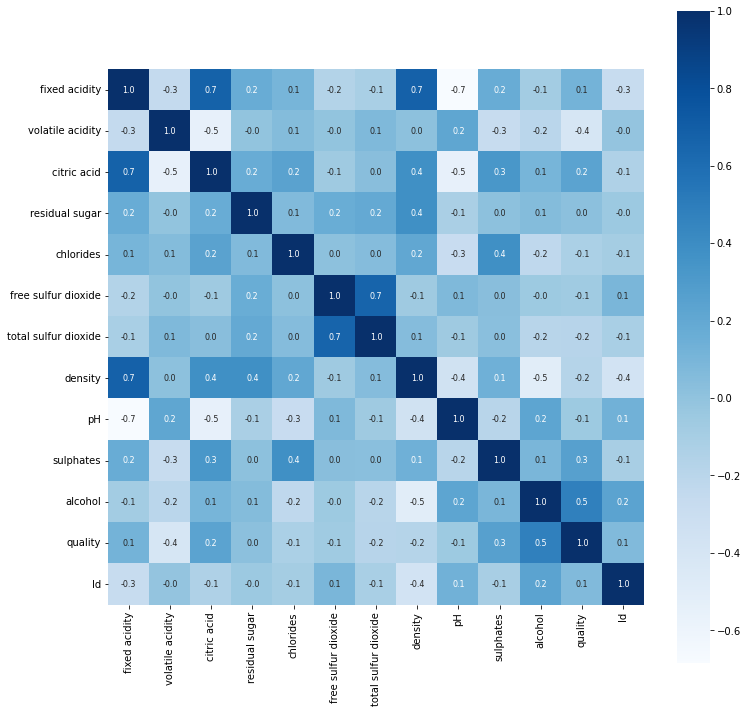

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation, cbar=True, square=True, annot= True, annot_kws={'size':8}, cmap= "Blues", fmt = '.1f')

Dark color shows that the values are close to each other eg fixed acidity and density, fixed acidity and citric acid, citric acid and fixed acidity, fixed acidity and density.
> light color shows that values are not close to each other.

**DATA PREPROCESSING**

Separating data and labels

In [39]:
x= df.drop("quality", axis=1)
print (x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

Label Binarization

In [40]:
y = df["quality"].apply(lambda y_value:1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


Spliting data into training and testing data

In [42]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=3)

In [44]:
print(y.shape, y_train.shape, y_test.shape)

(1143,) (914,) (229,)


**MODEL TRAINING**

Random Forest Classifier

In [47]:
model = RandomForestClassifier()

In [48]:
model.fit(x_train, y_train)

RandomForestClassifier()

**MODEL EVALUATION**

**Accuracy Score**

In [49]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [51]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.8908296943231441


**Precision Score**

In [52]:
x_test_prediction = model.predict(x_test)
test_data_precision = precision_score(x_test_prediction, y_test)

In [53]:
print('Precision:', test_data_precision)

Precision: 0.5


**Recall Score**

In [54]:
x_test_prediction = model.predict(x_test)
test_data_recall = recall_score(x_test_prediction, y_test)

In [55]:
print('Recall:', test_data_recall)

Recall: 0.76


**F1 score**

In [56]:
x_test_prediction = model.predict(x_test)
test_data_f1score = f1_score(x_test_prediction, y_test)

In [58]:
print('f1 score:', test_data_f1score)

f1 score: 0.6031746031746031


BUILDING PREDICTIVE SYSTEM

In [59]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7)

Changing the input data into an array


In [60]:
input_data_as_numpy_array = np.asanyarray(input_data)

so we reshape the data since we are predicting the label for only one instance

In [61]:
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

[0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [62]:
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
